In [2]:
# this file is for data prepocessing:
# clean the original Twitter texts

# import
import re
import pandas as pd 
import numpy as np 
from wordcloud import WordCloud
from google.colab import drive
from collections import Counter
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('SemEval2017-task4-train.subtask-A.arabic.txt', sep="\t",names=['Number','Label','Text'])
df

,Number,Label,Text
0,783555835494592513,positive,إجبار أبل على التعاون على فك شفرة اجهزتها http...
1,783582397166125056,positive,RT @20fourMedia: #غوغل تتحدى أبل وأمازون بأجهز...
2,783592390728769536,positive,جوجل تنافس أبل وسامسونج بهاتف جديد https://t.c...
3,783597390070685696,positive,رئيس شركة أبل: الواقع المعزز سيصبح أهم من الطع...
4,783617442031472640,neutral,ساعة أبل في الأسواق مرة أخرى https://t.co/dY2x...
...,...,...,...
3348,785923681432117248,positive,طريقة تعطيل اي زر في لوحة المفاتيح على نظام وي...
3349,785924823860076544,neutral,RT @syst__em: إطلاق تحديث تراكمي برقم 14393.32...
3350,785929366756655104,neutral,4 طرق لحذف الملفات المستعصية من الحذف في ويندو...
3351,785951682467246080,neutral,شرح فيديو مهم جدا حل لمشاكل الكومبيوتر كيف تقو...


In [27]:
def remove_handles(input):
    for i in re.findall("@[\w]*|#[\w]*", input):
      input = re.sub(i, '', input)
    # for i in re.findall("#[\w]*", input):
    #   input = re.sub(i, '', input)
    return input 

def remove_english(input):
    for i in re.findall("[a-zA-Z/:0-9]", input):
      input = re.sub(i, '', input)
    return input 

def data_prepocessing(df):
  # remove twitter sentences in @xxx or #xxx format
  df['handles_removed'] = np.vectorize(remove_handles)(df['Text'])

  # remove special characters, numbers, punctuations, and english words
  df['tidy'] = np.vectorize(remove_english)(df['handles_removed'])

  return df

In [32]:
# data exploration
def data_exploration(df):

  # Labels:
  print("Label Distribuition")
  counter = Counter(df.Label)
  plt.figure(figsize=(5,3))
  plt.bar(counter.keys(), counter.values())
  print(counter.keys())
  print(counter.values())
  plt.title("Labels Distribuition")

  # max length of twitter
  documents = [_text.split() for _text in df.Text] 
  max_len = 0
  for _text in df.Text:
    token = [t for t in _text.split()]
    max_len = len(token) if max_len < len(token) else max_len
  print("Max Twitter Length:")
  print(max_len)



               Number     Label  \
0  783555835494592513  positive   
1  783582397166125056  positive   
2  783592390728769536  positive   
3  783597390070685696  positive   
4  783617442031472640   neutral   

                                                Text  \
0  إجبار أبل على التعاون على فك شفرة اجهزتها http...   
1  RT @20fourMedia: #غوغل تتحدى أبل وأمازون بأجهز...   
2  جوجل تنافس أبل وسامسونج بهاتف جديد https://t.c...   
3  رئيس شركة أبل: الواقع المعزز سيصبح أهم من الطع...   
4  ساعة أبل في الأسواق مرة أخرى https://t.co/dY2x...   

                                     handles_removed  \
0  إجبار أبل على التعاون على فك شفرة اجهزتها http...   
1  RT :  تتحدى أبل وأمازون بأجهزة جديدةhttps://t....   
2  جوجل تنافس أبل وسامسونج بهاتف جديد https://t.c...   
3  رئيس شركة أبل: الواقع المعزز سيصبح أهم من الطع...   
4  ساعة أبل في الأسواق مرة أخرى https://t.co/dY2x...   

                                   spec_char_removed  \
0        إجبار أبل على التعاون على فك شفرة اجهزتها .   
1  

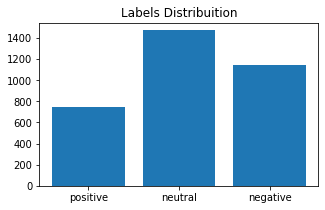

In [35]:
# main:

# data prepocessing
df_new = data_prepocessing(df)
print(df_new.head(5))
df_new.to_csv("dataA_Arabic_tidy.csv")

# data exploration
data_exploration(df_new)